### Telecom Churn Prediction Case Study
#### Goals of the case study
    ### Predict churn of the customers
    ### Identify the factors influencing the churn, so that it can be controlled

#### Steps 
    1. Read data, check basic details of the data
    2. EDA - to be done
    3. Data Preparation 
        3.1 Get the high-value customers 
            a. For these columns, perform the missing data handling first
            b. Derive the necessary columns
            c. Filter the data (>= 70th percentile)
        3.2 Derive the churn information based on the month 9 data
            Drop the Month 9 related columns
        3.3 Missing data handling
        3.4 Drop columns which add no value to the modeling process
        3.5 Derived Features
        3.6 Outlier Analysis/Treatment
        3.7 Data Imbalance
    4. PCA
    5. Modelling
    6. Model Evaluation
    

In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
# Importing data
telecom_data = pd.read_csv("telecom_churn_data.csv")
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.0,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
# Describe the data
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,...,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,...,0.659363,192.600982,200.981292,197.526489,192.734315,51.904956,51.229937,50.170154,44.719701,121.396219,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533

In [6]:
# Info about the data
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
# SHape about the data
telecom_data.shape

(99999, 226)

### Data Preparation

#### High Value Customer - Filtering

In [8]:
# Checking the 70th percentile of the ARPU column
telecom_data.arpu_6_7 = (telecom_data.arpu_6+telecom_data.arpu_7)/2 
p_70 = np.percentile(telecom_data.arpu_6_7, 70) 
p_70

C:\Archana\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


317.30929999999984

In [9]:
high_value_data = telecom_data.loc[(telecom_data.arpu_6_7 >= p_70)]
high_value_data.shape

(30000, 226)

In [10]:
# Missing data handling for the Revenue columns, rest will be done later
telecom_data.total_rech_data_6.fillna(0,inplace=True)
telecom_data.av_rech_amt_data_6.fillna(0,inplace=True)
telecom_data.total_rech_data_7.fillna(0,inplace=True)
telecom_data.av_rech_amt_data_7.fillna(0,inplace=True)

telecom_data.total_rech_amt_6.fillna(0,inplace=True)
telecom_data.total_rech_amt_7.fillna(0,inplace=True)


In [11]:
# Derived Features - Calculate Total Revenue Generated by the user to decide on the High value customer
# Month 6
telecom_data.total_data_6 = telecom_data.total_rech_data_6*telecom_data.av_rech_amt_data_6
telecom_data.total_call_6 = telecom_data.total_rech_amt_6
telecom_data.total_revenue_6 = telecom_data.total_call_6 + telecom_data.total_data_6

# Month 7
telecom_data.total_data_7 = telecom_data.total_rech_data_7*telecom_data.av_rech_amt_data_7
telecom_data.total_call_7 = telecom_data.total_rech_amt_7
telecom_data.total_revenue_7 = telecom_data.total_call_7 + telecom_data.total_data_7


telecom_data.av_rech_6_7 = (telecom_data.total_revenue_6+telecom_data.total_revenue_7)/2



C:\Archana\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Archana\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
C:\Archana\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\Archana\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable

In [12]:
telecom_data.av_rech_6_7.head()

0    559.0
1    306.0
2    241.5
3    270.0
4    301.0
dtype: float64

In [13]:
# Checking the 70th percentile value
p_70 = np.percentile(telecom_data.av_rech_6_7, 70) 
p_70

478.0

In [14]:
#Filter data >= 70th percentile. Henceforth, we will work with this dataset
high_value_data = telecom_data.loc[(telecom_data.av_rech_6_7 >= p_70)]
high_value_data.shape

(30001, 226)

##### As can be seen above, using the ARPU column and the derived revenue columns yield similar results. However, as per the guidance, using the derived renevue columns to decide on the high value customer data set

#### Deriving Churn

In [15]:
#Check the null values in the columns required for the churn calculation
print(round(100*(high_value_data.total_ic_mou_9.isnull().sum()/len(high_value_data.total_ic_mou_9.index)), 2))
print(round(100*(high_value_data.total_og_mou_9.isnull().sum()/len(high_value_data.total_og_mou_9.index)), 2))
print(round(100*(high_value_data.vol_2g_mb_9.isnull().sum()/len(high_value_data.vol_2g_mb_9.index)), 2))
print(round(100*(high_value_data.vol_3g_mb_9.isnull().sum()/len(high_value_data.vol_3g_mb_9.index)), 2))

0.0
0.0
0.0
0.0


No missing values found, proceed to deriving churn

In [16]:
# Since we are using the usage-based churn,
# define a function which returns 1(Churn) if no usage, 0 (No Churn) if any usage is seen 

def retChurn(row):
    if row.total_ic_mou_9 > 0 and row.total_og_mou_9 > 0 and row.vol_2g_mb_9 > 0 and row.vol_3g_mb_9 > 0:
        return 0
    else:
        return 1
    

In [17]:
# Apply this function on the dataset
high_value_data['churn_flag'] = high_value_data.apply (lambda row: retChurn(row), axis=1)
high_value_data.churn_flag.head()

0     1
7     1
8     1
21    1
23    0
Name: churn_flag, dtype: int64

In [18]:
#Drop all Month 9 columns since the churn is derived
colsToDrop_df = high_value_data.loc[:,high_value_data.columns.str.endswith('_9')]
high_value_data.drop( colsToDrop_df.columns, axis = 1, inplace = True)
high_value_data.shape

(30001, 173)

#### Missing Data Handling

In [19]:
# Checking the percentage of missing values
for column in high_value_data:
    print(column + "----"+str(round(100*(high_value_data[column].isnull().sum()/len(high_value_data[column].index)), 2)))

mobile_number----0.0
circle_id----0.0
loc_og_t2o_mou----0.75
std_og_t2o_mou----0.75
loc_ic_t2o_mou----0.75
last_date_of_month_6----0.0
last_date_of_month_7----0.09
last_date_of_month_8----0.55
arpu_6----0.0
arpu_7----0.0
arpu_8----0.0
onnet_mou_6----1.82
onnet_mou_7----1.79
onnet_mou_8----3.91
offnet_mou_6----1.82
offnet_mou_7----1.79
offnet_mou_8----3.91
roam_ic_mou_6----1.82
roam_ic_mou_7----1.79
roam_ic_mou_8----3.91
roam_og_mou_6----1.82
roam_og_mou_7----1.79
roam_og_mou_8----3.91
loc_og_t2t_mou_6----1.82
loc_og_t2t_mou_7----1.79
loc_og_t2t_mou_8----3.91
loc_og_t2m_mou_6----1.82
loc_og_t2m_mou_7----1.79
loc_og_t2m_mou_8----3.91
loc_og_t2f_mou_6----1.82
loc_og_t2f_mou_7----1.79
loc_og_t2f_mou_8----3.91
loc_og_t2c_mou_6----1.82
loc_og_t2c_mou_7----1.79
loc_og_t2c_mou_8----3.91
loc_og_mou_6----1.82
loc_og_mou_7----1.79
loc_og_mou_8----3.91
std_og_t2t_mou_6----1.82
std_og_t2t_mou_7----1.79
std_og_t2t_mou_8----3.91
std_og_t2m_mou_6----1.82
std_og_t2m_mou_7----1.79
std_og_t2m_mou_8----3.

In [20]:
print(high_value_data.date_of_last_rech_6.mode())
print(high_value_data.date_of_last_rech_7.mode())
print(high_value_data.date_of_last_rech_8.mode())


0    6/30/2014
dtype: object
0    7/31/2014
dtype: object
0    8/31/2014
dtype: object


In [21]:
# Missing Data Handling for Date columns

# For date of last rech, used the mode
high_value_data.date_of_last_rech_6.fillna(pd.to_datetime('6/30/2014'),inplace=True)
high_value_data.date_of_last_rech_7.fillna(pd.to_datetime('7/31/2014'),inplace=True)
high_value_data.date_of_last_rech_8.fillna(pd.to_datetime('8/31/2014'),inplace=True)

#For date of rech data, used the date of rech, since most of the values match for these 2 columns
high_value_data.date_of_last_rech_data_6.fillna(high_value_data.date_of_last_rech_6,inplace=True)
high_value_data.date_of_last_rech_data_7.fillna(high_value_data.date_of_last_rech_7,inplace=True)
high_value_data.date_of_last_rech_data_8.fillna(high_value_data.date_of_last_rech_8,inplace=True)

In [22]:
#For all other numneric columns, imputing with 0
high_value_data.fillna(0,inplace=True)

In [23]:
# Checking the percentage of missing values to ensure all are handled
for column in high_value_data:
    print(column + "----"+str(round(100*(high_value_data[column].isnull().sum()/len(high_value_data[column].index)), 2)))

mobile_number----0.0
circle_id----0.0
loc_og_t2o_mou----0.0
std_og_t2o_mou----0.0
loc_ic_t2o_mou----0.0
last_date_of_month_6----0.0
last_date_of_month_7----0.0
last_date_of_month_8----0.0
arpu_6----0.0
arpu_7----0.0
arpu_8----0.0
onnet_mou_6----0.0
onnet_mou_7----0.0
onnet_mou_8----0.0
offnet_mou_6----0.0
offnet_mou_7----0.0
offnet_mou_8----0.0
roam_ic_mou_6----0.0
roam_ic_mou_7----0.0
roam_ic_mou_8----0.0
roam_og_mou_6----0.0
roam_og_mou_7----0.0
roam_og_mou_8----0.0
loc_og_t2t_mou_6----0.0
loc_og_t2t_mou_7----0.0
loc_og_t2t_mou_8----0.0
loc_og_t2m_mou_6----0.0
loc_og_t2m_mou_7----0.0
loc_og_t2m_mou_8----0.0
loc_og_t2f_mou_6----0.0
loc_og_t2f_mou_7----0.0
loc_og_t2f_mou_8----0.0
loc_og_t2c_mou_6----0.0
loc_og_t2c_mou_7----0.0
loc_og_t2c_mou_8----0.0
loc_og_mou_6----0.0
loc_og_mou_7----0.0
loc_og_mou_8----0.0
std_og_t2t_mou_6----0.0
std_og_t2t_mou_7----0.0
std_og_t2t_mou_8----0.0
std_og_t2m_mou_6----0.0
std_og_t2m_mou_7----0.0
std_og_t2m_mou_8----0.0
std_og_t2f_mou_6----0.0
std_og_t2f_

#### Drop columns which add no additional information to the dataset

In [24]:
# Check which columns can be dropped
# Get the value counts of all the columns
for column in high_value_data:
    print(high_value_data[column].astype('category').value_counts())
    print('#####################################')


7002410905    1
7000810891    1
7000810183    1
7000810206    1
7000810224    1
7000810254    1
7000810312    1
7000810387    1
7000810402    1
7000810403    1
7000810721    1
7000810731    1
7000810743    1
7000810807    1
7000810916    1
7000811817    1
7000810948    1
7000810956    1
7000811056    1
7000811105    1
7000811226    1
7000811306    1
7000811361    1
7000811487    1
7000811518    1
7000811520    1
7000811675    1
7000811681    1
7000810140    1
7000810100    1
7000809976    1
7000809838    1
7000808207    1
7000808223    1
7000808257    1
7000808325    1
7000808398    1
7000808509    1
7000808534    1
7000808567    1
7000808598    1
7000808605    1
7000808617    1
7000808628    1
7000808642    1
7000808710    1
7000808775    1
7000808840    1
7000808935    1
7000809085    1
             ..
7001603205    1
7001603265    1
7001603394    1
7001603409    1
7001603445    1
7001603454    1
7001603468    1
7001603515    1
7001603539    1
7001603605    1
7001603658    1
70016037

0.00      3616
0.93        20
0.66        19
1.01        19
0.43        19
0.28        17
1.13        17
0.33        17
0.85        15
2.23        15
1.03        15
0.76        15
0.55        15
0.63        14
0.48        14
0.38        14
0.73        14
1.11        14
0.88        14
1.73        13
2.11        13
0.36        13
0.35        13
0.58        13
0.45        13
0.30        13
1.26        13
0.83        13
1.61        12
1.51        12
1.46        12
0.65        12
1.33        12
1.06        12
0.96        12
2.13        12
8.61        12
8.21        12
0.41        12
2.38        12
4.94        12
2.41        12
0.21        12
2.71        11
6.13        11
0.81        11
1.23        11
0.50        11
0.23        11
0.46        11
          ... 
353.59       1
353.48       1
353.38       1
353.28       1
353.13       1
353.08       1
353.04       1
357.41       1
352.99       1
352.83       1
352.78       1
352.76       1
352.63       1
352.58       1
352.49       1
352.48    

0.00       2489
0.98         19
0.23         13
0.40         12
0.95         11
12.86        11
0.78         11
0.41         10
1.96         10
10.93        10
9.84         10
1.76         10
1.58         10
0.71         10
5.08         10
2.76         10
7.03         10
0.46         10
4.06          9
1.98          9
9.04          9
26.64         9
0.60          9
0.76          9
9.66          9
0.91          9
1.16          9
1.06          9
0.93          9
15.46         9
2.83          9
5.34          9
12.66         9
17.46         9
11.19         9
23.94         8
7.88          8
1.38          8
4.16          8
7.91          8
2.81          8
29.76         8
7.68          8
1.01          8
2.99          8
13.76         8
12.09         8
65.94         8
10.33         8
2.48          8
           ... 
134.73        1
134.69        1
306.84        1
134.63        1
134.61        1
134.59        1
134.58        1
134.54        1
134.53        1
134.51        1
134.46        1
307.31  

0.00      14471
0.50         30
0.63         21
0.70         20
0.60         20
0.31         20
0.30         19
0.56         19
0.45         19
0.38         19
0.33         19
0.46         18
0.53         18
1.46         18
1.18         17
0.18         17
0.55         17
0.68         17
0.43         17
0.88         17
0.76         17
0.28         17
0.65         16
0.96         16
1.76         16
1.11         16
0.58         16
0.85         16
0.41         16
0.48         16
0.75         16
0.23         15
1.28         15
2.26         14
0.26         14
0.51         14
2.56         14
0.15         13
0.81         13
1.06         13
0.21         13
1.08         13
1.00         13
1.68         13
0.61         13
1.16         13
0.35         13
1.38         13
2.36         13
1.01         12
          ...  
391.11        1
390.96        1
390.81        1
390.56        1
390.46        1
390.44        1
390.43        1
390.41        1
389.98        1
389.56        1
386.13        1
385.94  

0.00     28099
0.01        37
1.01        36
0.03        26
0.08        22
0.28        21
0.06        20
0.10        20
0.63        19
0.11        19
0.36        19
0.26        19
0.13        18
0.18        17
0.20        17
0.23        17
0.15        17
0.16        16
0.40        16
0.35        16
0.33        16
0.30        15
0.45        15
0.25        15
0.38        14
0.31        14
0.48        13
0.58        13
0.05        13
2.01        13
0.76        12
0.21        11
0.41        11
0.65        11
0.46        10
0.51        10
0.55         9
0.61         9
0.50         8
1.06         8
0.80         8
1.03         8
0.70         8
0.53         8
1.00         7
0.66         7
0.95         7
4.01         7
0.98         7
0.73         7
         ...  
27.48        1
27.28        1
26.85        1
26.74        1
26.58        1
26.16        1
26.14        1
25.49        1
25.38        1
25.31        1
25.28        1
25.16        1
24.98        1
24.73        1
24.68        1
24.65     

0.00      1582
0.63        13
0.96        11
12.04       10
0.43        10
3.86        10
3.36        10
0.26        10
13.28       10
11.93        9
11.66        9
3.76         9
0.46         9
18.56        9
0.81         9
0.83         9
0.31         9
5.91         9
13.71        9
15.98        9
26.26        9
5.68         9
0.18         9
43.39        9
14.66        8
67.49        8
58.66        8
1.38         8
15.14        8
16.46        8
19.91        8
19.76        8
36.38        8
2.66         8
43.08        8
14.33        8
48.06        8
19.39        8
4.59         8
29.43        8
0.91         8
20.49        8
1.26         8
22.89        8
22.23        8
0.56         8
0.33         8
23.29        8
11.09        8
22.46        8
          ... 
233.91       1
234.41       1
234.33       1
234.29       1
234.23       1
234.21       1
234.19       1
234.13       1
234.09       1
234.03       1
233.93       1
233.81       1
234.48       1
233.74       1
233.71       1
233.61    

0.00     8150
0.03       60
0.30       59
0.33       58
0.31       54
0.26       53
0.43       52
0.38       52
0.48       49
0.35       46
0.58       45
0.46       44
0.51       44
0.56       44
0.21       43
0.40       43
0.53       42
0.01       42
0.36       42
0.91       42
0.78       41
0.18       41
0.66       40
0.71       40
0.88       39
1.06       37
0.25       37
0.23       37
0.76       37
0.05       36
0.28       36
1.38       35
0.83       35
0.13       35
0.61       35
0.98       34
0.86       34
0.50       33
0.55       33
0.70       33
1.08       33
0.20       33
0.41       33
0.73       32
1.16       32
0.16       32
1.01       31
0.68       31
1.31       31
0.63       31
         ... 
86.59       1
86.61       1
86.66       1
86.68       1
86.71       1
86.84       1
87.91       1
88.01       1
88.03       1
89.59       1
89.26       1
89.28       1
89.33       1
89.41       1
89.44       1
89.46       1
89.49       1
89.53       1
89.71       1
88.06       1
89.78 

0.00     23421
0.15       667
0.13       310
0.06       300
0.30       266
0.08       237
0.28       234
0.05       225
0.20       213
0.21       203
0.18       190
0.10       186
0.11       171
0.23       163
0.43       162
0.26       161
0.45       137
0.16       128
0.36       126
0.03       124
0.33       119
0.25       118
0.19       109
0.31       105
0.38       105
0.14        96
0.41        90
0.24        89
0.39        88
0.34        87
0.58        86
0.29        79
0.53        78
0.60        77
0.51        72
0.46        71
0.40        69
0.49        67
0.56        65
0.54        63
0.48        59
0.44        47
0.73        38
0.35        37
0.68        33
0.63        33
0.59        32
0.01        31
0.66        29
0.64        29
0.09        26
0.71        26
0.75        26
0.61        23
0.69        22
0.55        19
0.50        17
0.88        15
0.81        12
0.76        12
0.90        11
0.86        11
0.74         9
0.78         9
0.83         8
0.65         8
0.84      

0.0       14048
25.0       2932
252.0      2644
154.0      2405
23.0       1243
198.0      1028
98.0        796
17.0        596
152.0       586
145.0       550
179.0       539
46.0        295
41.0        283
175.0       281
455.0       254
91.0        237
56.0        197
274.0       115
49.0        111
202.0       107
164.0        90
655.0        90
8.0          68
33.0         67
14.0         62
48.0         59
449.0        43
29.0         34
125.0        32
755.0        27
248.0        26
951.0        24
149.0        21
505.0        19
855.0        13
177.0        12
101.0        10
1.0          10
13.0          9
5.0           9
1555.0        8
22.0          8
52.0          7
1255.0        1
15.0          1
1505.0        1
675.0         1
495.0         1
61.0          1
Name: max_rech_data_8, dtype: int64
#####################################
0.0     17555
1.0      5859
2.0      2198
3.0      1061
4.0       776
5.0       567
6.0       457
7.0       357
8.0       287
9.0       237
10

 0.00      16989
 212.17     1010
 63.96       376
 122.07      307
 424.34      262
 0.01        246
 150.67      137
 0.10        110
 0.02        109
 21.91       106
 77.68       103
 224.00       79
 389.00       77
 0.20         72
 636.51       68
 35.00        67
 67.55        67
-0.04         61
 0.40         58
 85.01        55
 0.30         51
 559.22       50
 442.58       45
 0.04         44
 244.14       40
-0.09         37
-0.03         35
 0.06         34
 0.50         33
 0.60         32
 436.17       32
 301.34       31
 10.00        31
 5.00         30
 1.00         29
 127.92       29
 155.36       28
 43.82        27
 0.90         25
 334.24       25
 398.61       24
 0.70         24
 1.40         24
 0.80         23
 212.18       22
 0.03         21
 2.00         21
 12.00        21
-0.08         20
 70.00        20
           ...  
 147.68        1
 147.84        1
 148.00        1
 148.35        1
 148.45        1
 148.60        1
 148.65        1
 150.49       

In [25]:
#Looking through the above result, certain columns ad dno variance in the dataset, since they contain just 1 value
# hence dropping these columns

high_value_data.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou', 'last_date_of_month_6','last_date_of_month_7',
                'last_date_of_month_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
           'std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis = 1, inplace = True)


In [26]:
high_value_data.shape

(30001, 160)

#### Derived Features

In [27]:
# Derived Features - Calculate Total Revenue Generated by the user for Month 6,7,8
#month 6
high_value_data.total_data_6 = high_value_data.total_rech_data_6*high_value_data.av_rech_amt_data_6
high_value_data.total_call_6 = high_value_data.total_rech_amt_6
high_value_data['total_revenue_6'] = high_value_data.total_call_6 + high_value_data.total_data_6

# Month 7
high_value_data.total_data_7 = high_value_data.total_rech_data_7*high_value_data.av_rech_amt_data_7
high_value_data.total_call_7 = high_value_data.total_rech_amt_7
high_value_data['total_revenue_7'] = high_value_data.total_call_7 + high_value_data.total_data_7

#Month 6 and 7 Average, since this is the "Good" phase
high_value_data['av_revenue_6_7'] = (high_value_data.total_revenue_6+high_value_data.total_revenue_7)/2

#Month 8
high_value_data.total_data_8 = high_value_data.total_rech_data_8*high_value_data.av_rech_amt_data_8
high_value_data.total_call_8 = high_value_data.total_rech_amt_8
high_value_data['total_revenue_8'] = high_value_data.total_call_8 + high_value_data.total_data_8

high_value_data = high_value_data.reset_index()

C:\Archana\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Archana\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
C:\Archana\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Archana\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/in

In [28]:
# Drop all the columns which already have other aggregate columns representing the same data. 
high_value_data.drop(['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8',
                      'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8',
                      'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8',
                      'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8',
                      'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                      'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8',
                      'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','total_rech_num_6','total_rech_num_7','total_rech_num_8',
                      'total_rech_data_6','total_rech_data_7','total_rech_data_8',
                      'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'], axis = 1, inplace = True)


In [29]:
high_value_data.shape

(30001, 117)

#### Outlier analysis

In [30]:
# Checking for outliers in the Revenue Columns
num_data = high_value_data.loc[:,['av_revenue_6_7','total_revenue_6','total_revenue_7', 'total_revenue_8']]
num_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,av_revenue_6_7,total_revenue_6,total_revenue_7,total_revenue_8
count,30001.000000,30001.000000,30001.000000,30001.000000
mean,1152.620628,1116.509509,1188.731748,1047.618398
std,1358.713982,1566.112291,1632.174907,1804.608844
min,478.000000,0.000000,0.000000,0.000000
25%,603.000000,546.000000,550.000000,396.000000
50%,800.000000,788.000000,812.000000,688.000000
75%,1208.000000,1210.000000,1267.000000,1152.000000
90%,1991.500000,2012.000000,2180.000000,2038.000000
95%,2798.500000,2906.000000,3150.000000,3043.000000
99%,6090.500000,6305.000000,7163.000000,6816.000000


#### Exploratory Data Analysis

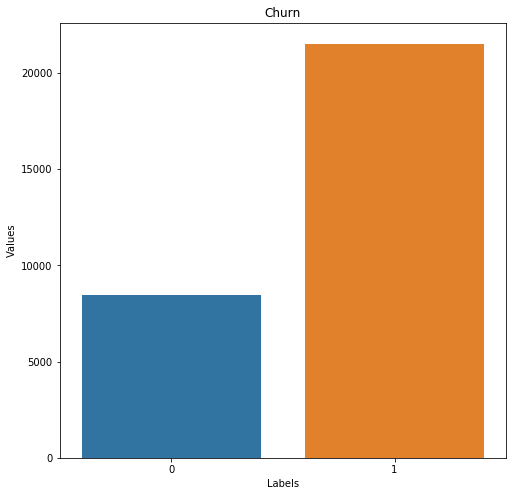

In [31]:
import seaborn as sns

cnt = high_value_data["churn_flag"].value_counts()
cnt_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })

plt.figure(figsize=(8,8))
sns.barplot(x='Labels', y='Values', data=cnt_df)
plt.title("Churn")
plt.show()

In [ ]:
#high_value_data.plot.pie(y='churn_flag', figsize=(5, 5))

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4740cff60>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4740d2a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4740cff28>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4740d2fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4740d4518>],
 'means': []}

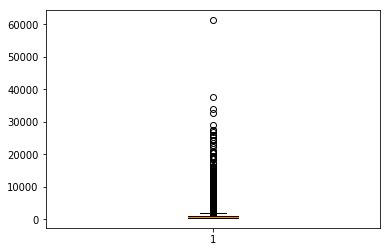

In [32]:
# Univariate analysis
plt.boxplot(high_value_data['av_revenue_6_7'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d40fef9e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1d40ff00550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d40fef9a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1d40ff00be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d40ff00f28>],
 'means': []}

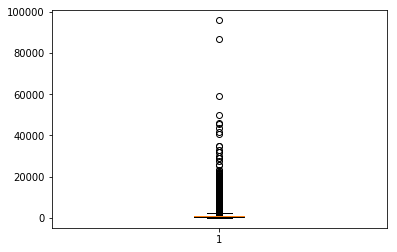

In [33]:
# Univariate analysis
plt.boxplot(high_value_data['total_revenue_8'])

33496401.77
35663141.18
31429599.57


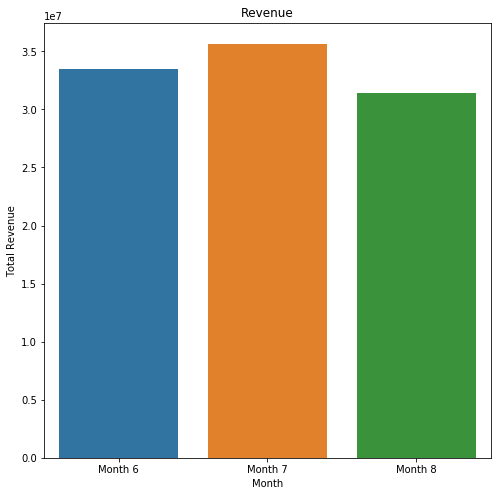

In [85]:
# Aggregating the revenue for each month
rev_month6 = round(high_value_data['total_revenue_6'].sum(),2)
print(rev_month6)
rev_month7 = high_value_data['total_revenue_7'].sum()
print(rev_month7)
rev_month8 = high_value_data['total_revenue_8'].sum()
print(rev_month8)

# initialize list of lists 
data = [['Month 6', 33496401.77], ['Month 7', 35663141.18], ['Month 8', 31429599.57]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Month', 'Total Revenue']) 
  
plt.figure(figsize=(8,8))
sns.barplot(x='Month', y='Total Revenue', data=df)
plt.title("Revenue")
plt.show()


### PCA & Modelling

In [34]:
#Copy the Data for modelling 
df = high_value_data.copy()
df.shape

(30001, 117)

In [35]:
#Drop the date columns (Object type)
df.drop(columns= list(df.select_dtypes(include=[object]).columns), axis = 1, inplace= True)
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 111 columns):
index                 int64
mobile_number         int64
arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_mou_6          float64
loc_og_mou_7          float64
loc_og_mou_8          float64
std_og_mou_6          float64
std_og_mou_7          float64
std_og_mou_8          float64
isd_og_mou_6          float64
isd_og_mou_7          float64
isd_og_mou_8          float64
spl_og_mou_6          float64
spl_og_mou_7          float64
spl_og_mou_8          float64
og_others_6           fl

In [36]:
#Drop mobile number 
df.drop("mobile_number", axis =1 , inplace =True)

In [37]:
#Split into X and Y
X = df[df.columns[~df.columns.isin(['churn_flag'])]]
Y = df['churn_flag']

#### Feature scaling 

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit_transform(X)

#### Train-Test split

In [39]:
#Splting the data in training ans testing dataframe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, Y, train_size=0.7, test_size= 0.3, random_state= 100)

In [40]:
print ("Training Data set size", X_train.shape)
print ("Training data set Target size", y_train.shape)
print ("Testing data set size", X_test.shape)
print ("Testing data set Target Size", y_test.shape)

Training Data set size (21000, 109)
Training data set Target size (21000,)
Testing data set size (9001, 109)
Testing data set Target Size (9001,)


#### PCA

In [41]:
#Importing PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [42]:
pca.components_

array([[ 1.56963894e-03,  4.45558322e-02,  5.37820930e-02, ...,
         1.51916176e-01,  1.62129161e-01,  1.37840256e-01],
       [ 1.18572449e-03,  2.19517816e-01,  2.37941354e-01, ...,
         4.91706504e-02,  5.42046082e-02,  5.53675284e-02],
       [-5.58584535e-04,  6.76646597e-02,  9.67447233e-02, ...,
         1.90867169e-01,  1.98869920e-01,  1.83722181e-01],
       ...,
       [-0.00000000e+00,  6.11004475e-17,  4.92063374e-17, ...,
        -2.91955570e-01,  4.86080399e-01,  5.63500184e-17],
       [-0.00000000e+00, -1.68112431e-16,  7.54369429e-17, ...,
         2.94175576e-02, -4.89776515e-02, -6.20800861e-17],
       [-0.00000000e+00, -6.30537299e-17, -5.33879083e-17, ...,
         9.99380738e-02, -1.66388121e-01,  1.55071232e-16]])

In [43]:
pca.explained_variance_ratio_

array([1.31790058e-01, 1.10212576e-01, 5.97880800e-02, 5.26189601e-02,
       4.57697095e-02, 3.29976759e-02, 3.01682385e-02, 2.85895007e-02,
       2.51991934e-02, 2.45852801e-02, 2.23173311e-02, 1.98183084e-02,
       1.95307921e-02, 1.84577768e-02, 1.67276313e-02, 1.65265407e-02,
       1.63788573e-02, 1.49934833e-02, 1.46209707e-02, 1.41940534e-02,
       1.35989214e-02, 1.29077329e-02, 1.11248789e-02, 1.08129076e-02,
       9.75045617e-03, 9.35002753e-03, 8.96353820e-03, 8.84205093e-03,
       8.60477192e-03, 8.42095638e-03, 8.25701126e-03, 7.66659225e-03,
       7.55514516e-03, 7.13952726e-03, 6.67093729e-03, 6.49858463e-03,
       6.43589081e-03, 5.95215747e-03, 5.49585268e-03, 5.37224614e-03,
       5.24879712e-03, 5.19080517e-03, 4.99250115e-03, 4.89552409e-03,
       4.65835569e-03, 4.01949117e-03, 3.96875009e-03, 3.90355742e-03,
       3.79539379e-03, 3.72131694e-03, 3.51495353e-03, 3.20942451e-03,
       3.15206391e-03, 3.08081704e-03, 3.06120792e-03, 2.93242465e-03,
      

In [44]:
#Let's check the variance ratios
per_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
per_var

array([13.2, 11. ,  6. ,  5.3,  4.6,  3.3,  3. ,  2.9,  2.5,  2.5,  2.2,
        2. ,  2. ,  1.8,  1.7,  1.7,  1.6,  1.5,  1.5,  1.4,  1.4,  1.3,
        1.1,  1.1,  1. ,  0.9,  0.9,  0.9,  0.9,  0.8,  0.8,  0.8,  0.8,
        0.7,  0.7,  0.6,  0.6,  0.6,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.2,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

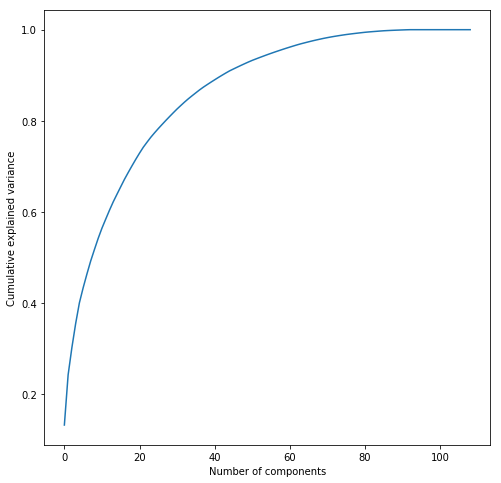

In [45]:
#Making the Screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [46]:
#Selecting PCA components explaining 95% of variation in Data
pca_again = PCA(0.95)
df_pca = pca_again.fit_transform(x_std)
df_pca.shape

(30001, 58)

In [47]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,Feature
0,0.001570,0.001186,-0.000559,index
1,0.044556,0.219518,0.067665,arpu_6
2,0.053782,0.237941,0.096745,arpu_7
3,0.061938,0.231528,0.092720,arpu_8
4,-0.059879,0.118744,0.051976,onnet_mou_6
5,-0.061191,0.130549,0.068007,onnet_mou_7
6,-0.050076,0.132041,0.066470,onnet_mou_8
7,-0.050448,0.165502,0.033153,offnet_mou_6
8,-0.052030,0.178250,0.050484,offnet_mou_7
9,-0.036871,0.172444,0.048492,offnet_mou_8


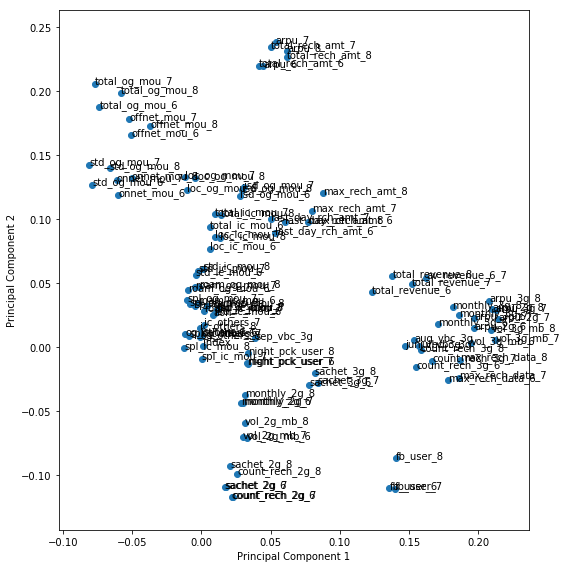

In [48]:
#Checking the loadings of PC1 and PC2
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [49]:
#Finally going ahead with incremental PCA for efficiency by choosing 58 PC
from sklearn.decomposition import IncrementalPCA
pca_df_final = IncrementalPCA(n_components=58)

In [50]:
pca_train= pca_df_final.fit_transform(X_train)
pca_train.shape

(21000, 58)

In [51]:
#creating correlation matrix for the principal components
pca_corr = np.corrcoef(pca_train.transpose())

In the PCA numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap

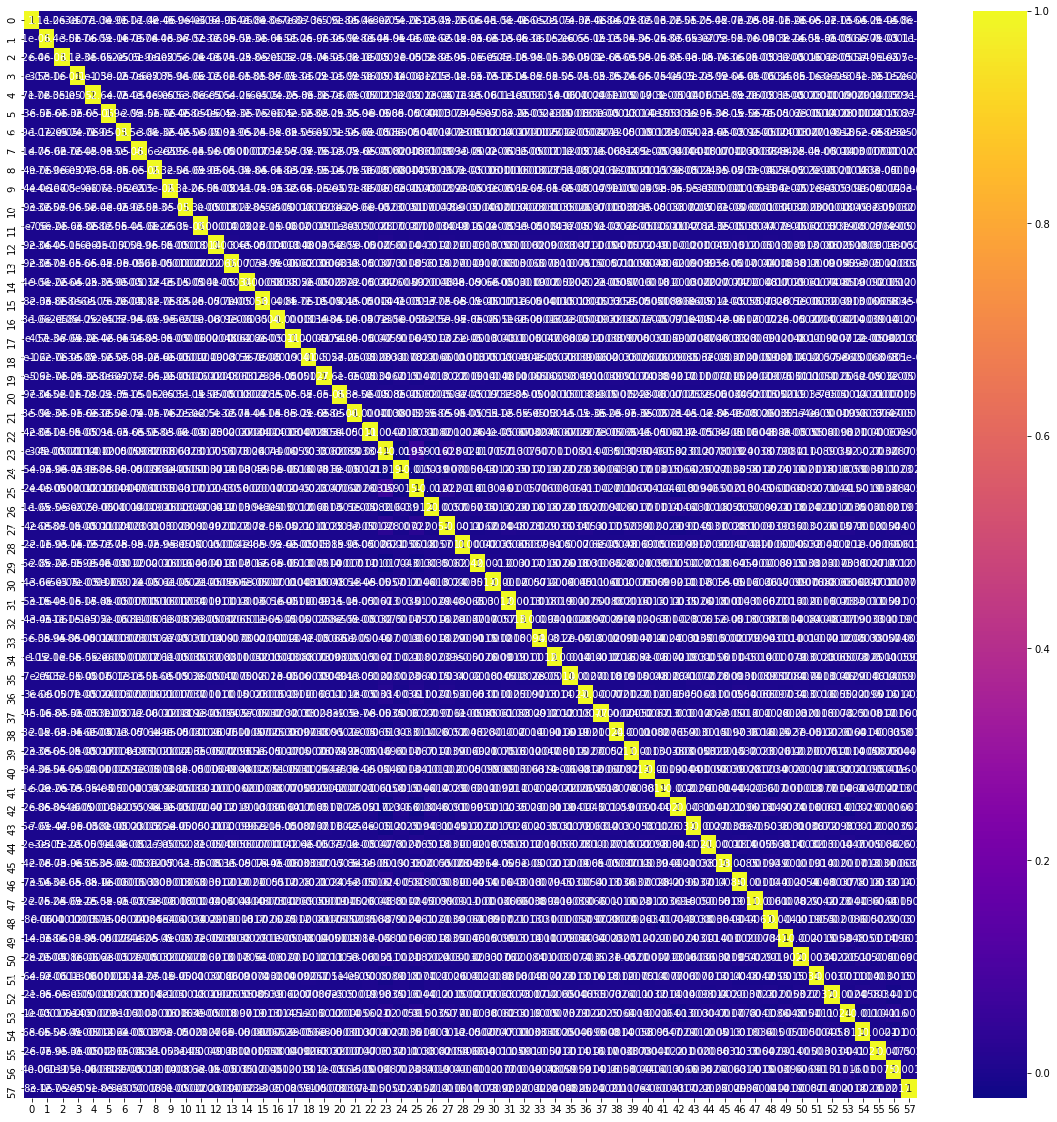

In [52]:
#plotting the correlation matrix
plt.figure(figsize = (20,20))
sns.heatmap(pca_corr, annot = True, cmap="plasma")
plt.show()

In [53]:
# Correlation validaiton for highly correlated variables
cor_val = pca_corr - np.diagflat(pca_corr.diagonal())
print("max corr:",cor_val.max(), ", min corr: ", cor_val.min(),)

max corr: 0.05865983417749796 , min corr:  -0.023450348322348026


The above heatmap and the color bar basically represent the correlation between the
various feature and the principal component itself.

As seen above the co-relation is close to 0 , so PCA has reduced the correlation between variables very close to 0

In [55]:
#Applying selected components to the test data
pca_test = pca_df_final.transform(X_test)
pca_test.shape

(9001, 58)

### Modelling

#### Logistic Regression

In [56]:
# Logistic Regression
#Importing libraries 
from sklearn.linear_model import LogisticRegression

#Applying LR on training data 
logmodel = LogisticRegression()
lr_pca_train = logmodel.fit(pca_train,y_train)

In [57]:
#Prediction on Test data
lr_pred_probab = logmodel.predict_proba(pca_test)[:,1]
lr_pred = logmodel.predict(pca_test)
lr_pred_probab[:10]
#"{:2.2f}".format(metrics.roc_auc_score(y_test, lr_pred_probab))

array([0.9763104 , 0.68228882, 0.81279453, 0.96747428, 0.72489791,
       0.96235442, 0.52867221, 0.64601248, 0.61807498, 0.98633523])

In [58]:
lr_pred_probab = lr_pred_probab.reshape(-1)
lr_pred_probab[:10]

array([0.9763104 , 0.68228882, 0.81279453, 0.96747428, 0.72489791,
       0.96235442, 0.52867221, 0.64601248, 0.61807498, 0.98633523])

### Model Evaluation 

In [59]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
# ROC function
def draw_roc(actual, prob):
    fpr, tpr, thresholds = metrics.roc_curve( actual, prob,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, prob )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    print("ROC for the test dataset",'{0:2}'.format(auc_score))
    plt.show()
    return None

#draw_roc(y_test, lr_pred_probab)

In [61]:
def eval_parm(label, predicted):
    print(classification_report(label, predicted))
    accuracy = metrics.accuracy_score(label, predicted)
    print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))
        
    ##Confusion matrix graph
    cm = confusion_matrix(label, predicted)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Non-churn','Churn']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
    plt.show()


              precision    recall  f1-score   support

           0       0.75      0.66      0.70      2518
           1       0.88      0.91      0.89      6483

    accuracy                           0.84      9001
   macro avg       0.81      0.79      0.80      9001
weighted avg       0.84      0.84      0.84      9001

Accuracy for the test dataset 84.4%


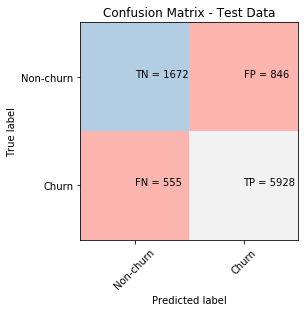

In [62]:
# Confusion Matrix 
eval_parm(y_test, lr_pred)

ROC for the test dataset 0.9004853164572779


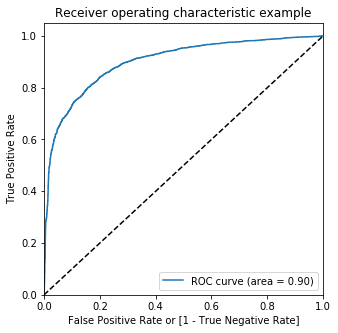

In [63]:
#RoC
draw_roc(y_test, lr_pred_probab)

In [64]:
# Let's check the overall accuracy
from sklearn import metrics
print(round(metrics.accuracy_score(y_test, lr_pred),2))

0.84


Only 84% variantion is being explained using 58 principal componenets

In [65]:
#Lets evaluate PCA for other variance %s
# Trying for 90%
pca_again = PCA(0.90)
pca_train_1 = pca_again.fit_transform(X_train)
pca_train_1.shape

(21000, 43)

In [66]:
pca_again = PCA(n_components=43)
pca_train_1 = pca_again.fit_transform(X_train)
pca_test_1 = pca_again.fit_transform(X_test)
pca_train_1.shape
pca_test_1.shape

(9001, 43)

In [67]:
#training the regression model with the new PCA data
logmodel = LogisticRegression()
model_pca1 = logmodel.fit(pca_train_1,y_train)

#Making prediction on the test data
pred_probs_test1 = model_pca1.predict_proba(pca_test_1)[:,1]
pred_test1 = model_pca1.predict(pca_test_1)

              precision    recall  f1-score   support

           0       0.50      0.42      0.46      2518
           1       0.79      0.84      0.81      6483

    accuracy                           0.72      9001
   macro avg       0.65      0.63      0.64      9001
weighted avg       0.71      0.72      0.71      9001

Accuracy for the test dataset 72.2%


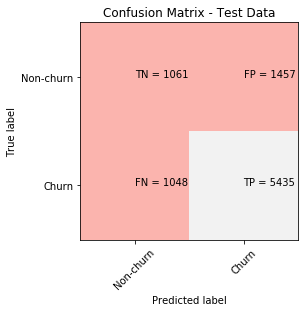

In [68]:
eval_parm(y_test, pred_test1)

ROC for the test dataset 0.7654876559295976


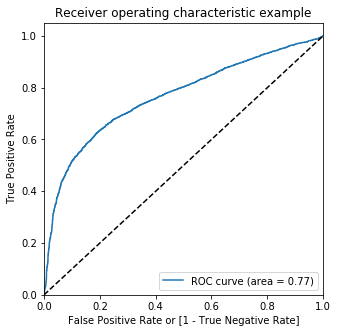

In [69]:
draw_roc(y_test, pred_probs_test1)

As we can see, the accuracy has dropped

In [70]:
#Trying another PCA with 25 components
pca_again = PCA(n_components=25)
pca_train_2 = pca_again.fit_transform(X_train)
pca_test_2 = pca_again.fit_transform(X_test)
pca_train_2.shape
pca_test_2.shape

(9001, 25)

              precision    recall  f1-score   support

           0       0.52      0.37      0.44      2518
           1       0.78      0.87      0.82      6483

    accuracy                           0.73      9001
   macro avg       0.65      0.62      0.63      9001
weighted avg       0.71      0.73      0.71      9001

Accuracy for the test dataset 73.0%


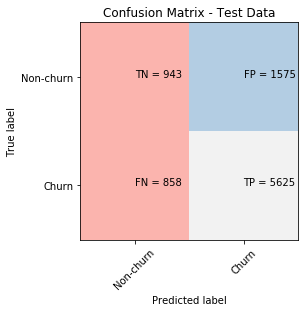

In [71]:
#training the regression model
logmodel = LogisticRegression()
model_pca1 = logmodel.fit(pca_train_2,y_train)

#Making prediction on the test data
pred_probs_test2 = model_pca1.predict_proba(pca_test_2)[:,1]
pred_test2 = model_pca1.predict(pca_test_2)
eval_parm(y_test,pred_test2)

ROC for the test dataset 0.7712647864880802


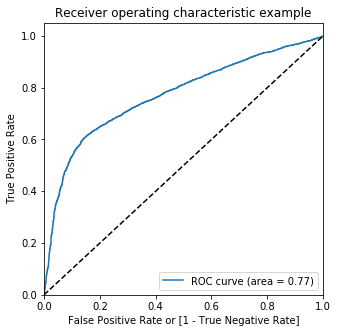

In [72]:
draw_roc(y_test, pred_probs_test2)

Since the accuracy has dropped with 43 and 25 components, we will proceed with 58 components

In [73]:
print("LogisticRegression accuracy with PCA: ",metrics.accuracy_score(y_test,lr_pred))

LogisticRegression accuracy with PCA:  0.8443506277080325


              precision    recall  f1-score   support

           0       0.75      0.66      0.70      2518
           1       0.88      0.91      0.89      6483

    accuracy                           0.84      9001
   macro avg       0.81      0.79      0.80      9001
weighted avg       0.84      0.84      0.84      9001

Accuracy for the test dataset 84.4%


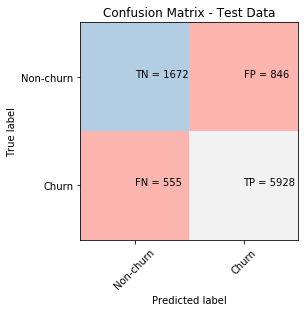

In [74]:
eval_parm(y_test,lr_pred)

ROC for the test dataset 0.9004853164572779


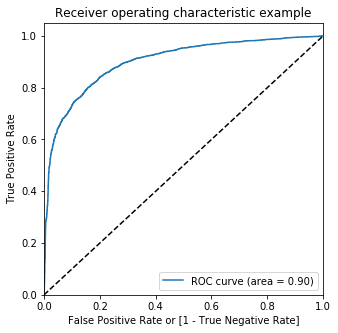

In [75]:
draw_roc(y_test, lr_pred_probab)

Best Accuracy has been achived using Default PCA feature which is 85

### Improving accuracy with regularisation method 

In [76]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [77]:
C = [10000, 500,100,10, 1, .1, .001] ##Regularization Function

for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf.fit(pca_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(pca_train,y_train))
    print('Test accuracy:', clf.score(pca_test,y_test))
    print('')

C: 10000
Coefficient of each feature: [[-0.38664346  0.1298482   0.09330082 -0.22049951  0.10144396 -0.28122162
   0.0126833  -0.03334475 -0.00715158 -0.10903442  0.08164859  0.06008469
  -0.08866811 -0.03876032 -0.07688468  0.12542041 -0.11780958  0.35149881
   0.38565344  0.26317891 -0.0777954   0.03837933 -0.184613   -0.11038525
  -0.60337872  0.06557281 -0.24123695 -0.20497652 -0.68169975  0.2343321
   0.00116889 -0.23587107 -0.12454283  0.18037608 -0.08223342  0.05475311
   0.08511658 -0.07179005  0.09206824 -0.02168749 -0.04364087  0.04158492
   0.09363497  0.01709821 -0.06503521 -0.11337599 -0.03478108  0.11548328
   0.01943512  0.04857804  0.02575501 -0.04084639 -0.09288297 -0.14455839
   0.00661818  0.07877573 -0.17415695  0.35469082]]
Training accuracy: 0.8426190476190476
Test accuracy: 0.8444617264748361

C: 500
Coefficient of each feature: [[-0.38664304  0.12984781  0.09330057 -0.22049926  0.10144327 -0.28122104
   0.01268359 -0.03334477 -0.00715176 -0.1090342   0.08164845 

__As seen from above , that accuracy is 85% with default PCA feature and is not improving even by adding l2 penatly__ 
__hyper-parameters, so we will use default PCA feature for further model evalutaion.__

### Stratified Kfold Samples 

In [78]:
from sklearn.model_selection  import StratifiedKFold
stratefied_Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=9999)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

## searchCV = LogisticRegressionCV(
##        Cs= list(np.power(10.0, np.arange(-10, 10)))
##        ,penalty='l2'
##        ,scoring='roc_auc'
##        ,cv=stratefied_Kfold
##        ,random_state=777
##        ,max_iter=100
##        ,fit_intercept=True
##        ,solver='newton-cg'
##        ,tol=1
##        ,verbose = 2
##        ,n_jobs = -1
##     )
## searchCV.fit(pca_train, y_train)

In [92]:
## print("final selected 1/lambda is ", searchCV.C_)
## print("final selected lambda is ", 1/searchCV.C_)

In [93]:
# Predict on test data
## preds_L2Search = searchCV.predict(pca_test)
## preds_L2Search_probs = searchCV.predict_proba(pca_test)[:,1]

In [94]:
# Evaluate this model
## eval_parm(y_test, preds_L2Search)
## draw_roc(y_test,preds_L2Search_probs )

The above code was run and found that accuracy and other metrics remain the same even with stratified k-fold sampling. 
Since the grid-search was taking too long on the local machine, the above code has been commented in the final version. This can be uncommented and run.

### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [87]:
# Fit on the train data
rfc.fit(pca_train,y_train)

# Making predictions on test data
predictions = rfc.predict(pca_test)

In [88]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      2518
           1       0.88      0.87      0.87      6483

    accuracy                           0.82      9001
   macro avg       0.78      0.79      0.78      9001
weighted avg       0.82      0.82      0.82      9001

Accuracy for the test dataset 82.1%


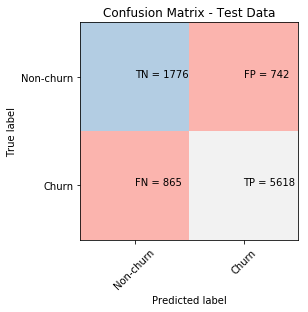

In [89]:
# Let's check the report of our default model
eval_parm(y_test, predictions)

#### Grid Search to Find Optimal Hyperparameters

In [83]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'] #'max_features': [15, 25, 35, 45, 56 ]
 }

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(pca_train, y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 10.8min finished


We can get accuracy of 0.8303809523809523 using {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.75      0.64      0.69      2518
           1       0.87      0.92      0.89      6483

    accuracy                           0.84      9001
   macro avg       0.81      0.78      0.79      9001
weighted avg       0.83      0.84      0.83      9001

Accuracy for the test dataset 83.9%


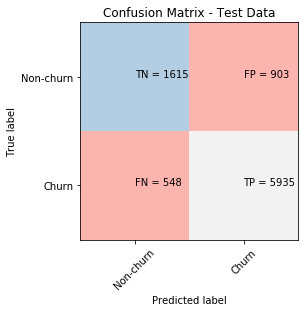

In [90]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features='sqrt',
                             n_estimators=200)

# fit
rfc.fit(pca_train,y_train)

# predict
predictions = rfc.predict(pca_test)

# Check the metrics
eval_parm(y_test, predictions)


Machine Learning algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets. 
For any imbalanced data set, if the event to be predicted belongs to the minority
class and the event rate is less than 5%, it is usually referred to as a rare event.

#### Imbalance treat with SMOTE method

In [91]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (21000, 109)
Number transactions y_train dataset:  (21000,)
Number transactions X_test dataset:  (9001, 109)
Number transactions y_test dataset:  (9001,)


In [92]:
# Using to SMOTE method to handle the data imbalance 
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 15041
Before OverSampling, counts of label '0': 5959 

After OverSampling, the shape of train_X: (30082, 109)
After OverSampling, the shape of train_y: (30082,) 

After OverSampling, counts of label '1': 15041
After OverSampling, counts of label '0': 15041


#### Logistic Regression on Resampled data

              precision    recall  f1-score   support

           0       0.64      0.83      0.72      2518
           1       0.93      0.82      0.87      6483

    accuracy                           0.82      9001
   macro avg       0.78      0.82      0.79      9001
weighted avg       0.85      0.82      0.83      9001

Accuracy for the test dataset 82.0%


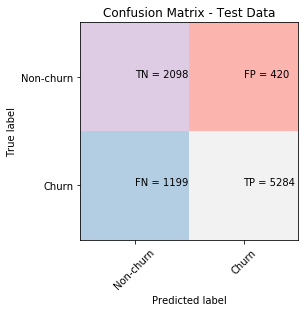

In [94]:
# Creating the model again with the oversampled data
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 

# Check the metrics
eval_parm(y_test, predictions)


#### Random Forest on Resampled data

              precision    recall  f1-score   support

           0       0.75      0.85      0.79      2518
           1       0.94      0.89      0.91      6483

    accuracy                           0.88      9001
   macro avg       0.84      0.87      0.85      9001
weighted avg       0.88      0.88      0.88      9001

Accuracy for the test dataset 87.8%


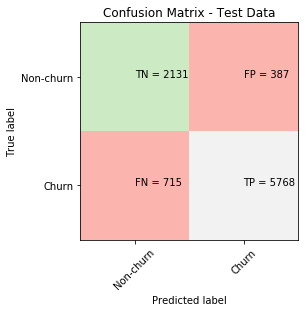

Accuracy for the test dataset 87.8%
ROC for the test dataset 93.6%


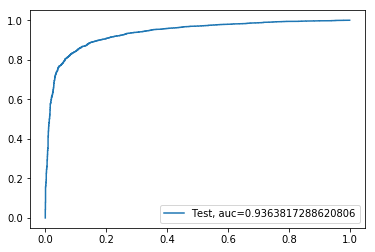

In [96]:
TrainedRFC= rfc.fit(X_train_res,y_train_res)
pred_rfc = rfc.predict(X_test)
preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

eval_parm(y_test, preds_RFC)
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [128]:
importances = rfc.feature_importances_
col_names =  X.columns

for name, importance in zip(list(col_names),importances):
    print(name, "=", importance)


index = 0.0060346515335329524
arpu_6 = 0.005543934795263245
arpu_7 = 0.004179634718618225
arpu_8 = 0.004971802920921975
onnet_mou_6 = 0.007486892757380288
onnet_mou_7 = 0.0051398884829336
onnet_mou_8 = 0.006349876659143957
offnet_mou_6 = 0.005366458329212999
offnet_mou_7 = 0.004671877493961718
offnet_mou_8 = 0.005658575613588105
roam_ic_mou_6 = 0.0016769540329208909
roam_ic_mou_7 = 0.0017218518907870177
roam_ic_mou_8 = 0.0018193207665118491
roam_og_mou_6 = 0.002201659300991797
roam_og_mou_7 = 0.001686723302959213
roam_og_mou_8 = 0.001749420912546164
loc_og_mou_6 = 0.004984760160251251
loc_og_mou_7 = 0.006227070983401899
loc_og_mou_8 = 0.018285144973825804
std_og_mou_6 = 0.003745617773522979
std_og_mou_7 = 0.0035086219556699607
std_og_mou_8 = 0.003928120507225165
isd_og_mou_6 = 0.0009759341043632235
isd_og_mou_7 = 0.000593706667115129
isd_og_mou_8 = 0.0005930692616530183
spl_og_mou_6 = 0.004023621315741102
spl_og_mou_7 = 0.0040741200692712455
spl_og_mou_8 = 0.004690730253610855
og_other

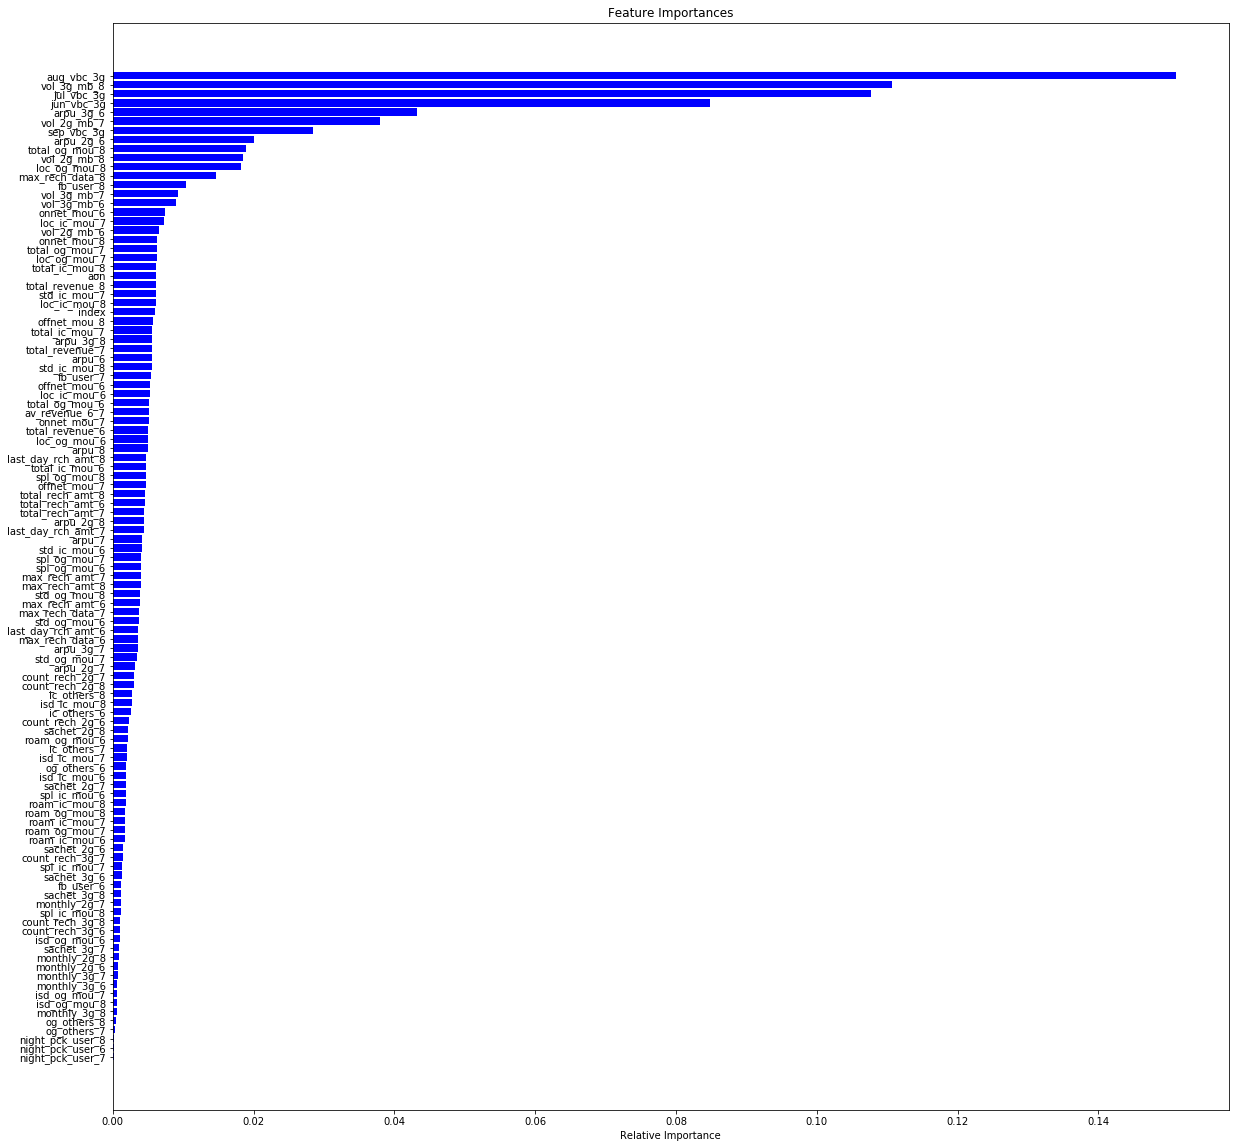

In [131]:
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [col_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Inferences 
__As seen in the chart above, the top 5 influening factors are__

_1.Volume Based Cost for Month 8_

_2.Mobile 3G usage of Month 8_ 

_3.Volume Based Cost for Month 6_

_4.Volume Based Cost for Month 7_

_5.ARPU_

__Some of the key observations__

_A reduction in availing any packs and paying only based on usage (so essentially Volume Based cost) is a big indicator of churn_

_ARPU(Average revenue per user) for month 6,7 & 8 are very strong indicator , if its getting reduced by every month then customers are likely to churn_

_Total outgoing minutes of usage is also something to watch, since a customer who is likely to churn will stop making outgoing calls_

_The other key factor is if the recharge amount shows a dip in the action phase is sign of churn_

_Age on network is also a key indicator for identifying the churn, if aon is less than 500 days and their usage is reduce then the customer is going to be churned_

_The usage of mobile data has also reduced when compared with 7th month. So, data usage & amount can also be the other features for understanding the churn behavior_



### Recommendation

_Offer discounts on various packs, in order to attract the customer to buy those packs and hence retain the customer_

_Offer loylity discount based on  Age on network. The company can also consider giving discount  to the customers who have been with the network for more than an year or less than 3 months_

_Give additional data on data pack recharges to encourage more 3G usage_

_Provide some attractive offers on Outgoing calls_

_Monitor the total recharge, offer additional talk time with additional validity on the recharges_

_Based on the usage / last recharge, if the usage is less compared to previous months, speak to the customer to know his concerns_

_To look into all of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers_ 

### Conclusion 
#### As seen above, given below is the conclusion
__Random forest gives a better overall accuracy of 88%__
__Precision is 94% which mean postive classified were correctly predicted__
__ROC curve is also 94% which indicates a better model__

__So we choose Random forest over logisitc regression based on the evaluation matrices__